# ANALISIS EXPLORATORIO DE DATOS EDA

### Setup y carga de datos.

In [1]:
# Librerías esenciales para EDA de fraude

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("🔧 Entorno configurado para análisis AML")

🔧 Entorno configurado para análisis AML


In [2]:

# Cargar el archivo CSV y Cargar a SQLite

csv   = pd.read_csv    (r'C:\Users\User\Desktop\PORTAFOLIO\Detección de Actividades Sospechosas con SQL + Python\data\Synthetic_Financial_datasets_log.csv')
conn = sqlite3.connect(r'C:\Users\User\Desktop\PORTAFOLIO\Detección de Actividades Sospechosas con SQL + Python\data\fraud_detection.db')
csv.to_sql('transactions', conn, index=False, if_exists='replace')

print(f"Dataset cargado: {len(csv):,} transacciones")
print(f"Fraudes detectados: {csv['isFraud'].sum():,} ({csv['isFraud'].mean()*100:.2f}%)")

Dataset cargado: 6,362,620 transacciones
Fraudes detectados: 8,213 (0.13%)


In [99]:
# Cargar dataset desde SQLite
conn = conn = sqlite3.connect(r'C:\Users\User\Desktop\PORTAFOLIO\Detección de Actividades Sospechosas con SQL + Python\data\fraud_detection.db')


# Cargar muestra inicial para exploración rápida
df_sample = pd.read_sql_query("""
    SELECT * FROM transactions 
    ORDER BY RANDOM() 
    LIMIT 100000
""", conn)

# Información básica del dataset
print("📊 INFORMACIÓN BÁSICA DEL DATASET")
print("="*50)
print(f"Filas: {len(df_sample):,}")
print(f"Columnas: {len(df_sample.columns)}")
print(f"Memoria: {df_sample.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Primeras filas
print("\n PRIMERAS 5 TRANSACCIONES:")
print(df_sample.head())

# Tipos de datos
print("\n TIPOS DE DATOS:")
print(df_sample.dtypes)

# Valores nulos
print("\n VALORES NULOS:")
print(df_sample.isnull().sum())

📊 INFORMACIÓN BÁSICA DEL DATASET
Filas: 100,000
Columnas: 11
Memoria: 22.83 MB

 PRIMERAS 5 TRANSACCIONES:
   step      type     amount    nameOrig  oldbalanceOrg  newbalanceOrig  \
0    16  CASH_OUT   80713.18  C987135310       11972.00            0.00   
1   327   PAYMENT    2620.74  C868083873       99888.64        97267.90   
2    22   PAYMENT    9125.75  C766742839       32270.00        23144.25   
3    18   PAYMENT    6845.81   C17727535           0.00            0.00   
4   229  TRANSFER  246533.99  C839284014           0.00            0.00   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  C1977611839            0.00        80713.18        0               0  
1   M548151467            0.00            0.00        0               0  
2   M582035300            0.00            0.00        0               0  
3  M1168990530            0.00            0.00        0               0  
4  C1758006398       404663.01       651196.99        0               0 

### FRAUDE POR TIPO DE TRANSACCION

In [ ]:
# Análisis de fraude por tipo de transacción
fraud_by_type = df_sample.groupby('type').agg({
    'isFraud': ['count', 'sum', 'mean'],
    'amount': ['mean', 'sum']
}).round(4)

fraud_by_type.columns = ['Total_Txns', 'Fraud_Count', 'Fraud_Rate', 'Avg_Amount', 'Total_Amount']
fraud_by_type = fraud_by_type.sort_values('Fraud_Rate', ascending=False)

print("🔍 FRAUDE POR TIPO DE TRANSACCIÓN:")
print("="*60)
print(fraud_by_type)

# Visualización
fig, axes = plt.subplots(1, 1, figsize=(12, 10))

# Gráfico 1: Tasa de fraude por tipo
fraud_by_type['Fraud_Rate'].plot(kind='bar', ax=axes, color='red', alpha=0.7)
axes.set_title('Tasa de Fraude por Tipo de Transacción')
axes.set_ylabel('Tasa de Fraude')
axes.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n INSIGHTS:")
print("- TRANSFER y CASH_OUT tienen las tasas de fraude más altas")
print("- PAYMENT tiene volumen alto pero baja tasa de fraude")

### ANALISIS TEMPORAL DE FRAUDE

 ANÁLISIS TEMPORAL
PATRONES POR HORA DEL DÍA:
      Total_Txns  Fraud_Count  Fraud_Rate
hour                                     
0           1128            3      0.0027
1            443            6      0.0135
2            138            9      0.0652
3             35            6      0.1714
4             21            4      0.1905
5             21            7      0.3333
6             55            5      0.0909
7            137            5      0.0365
8            371            7      0.0189
9           4456            3      0.0007


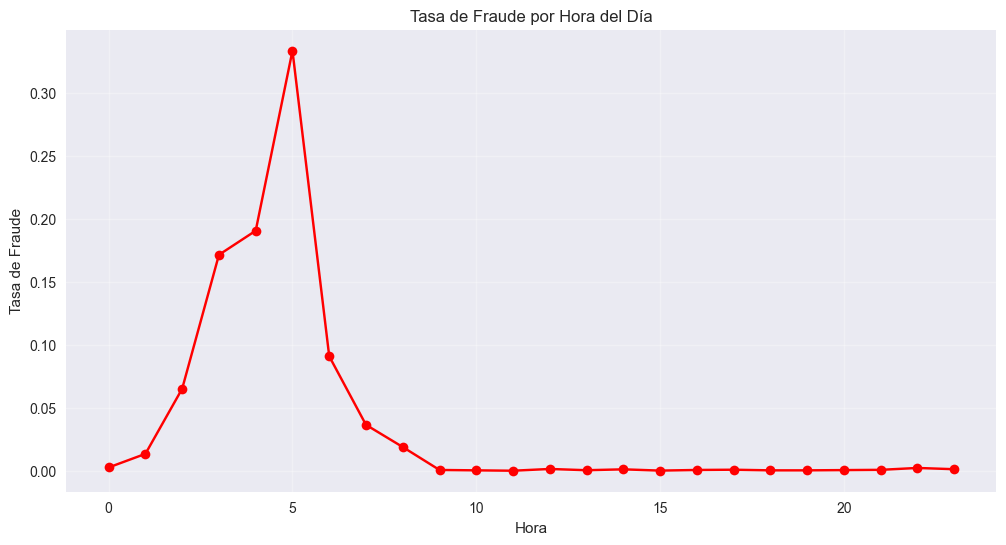


 INSIGHTS TEMPORALES:
- Identificamos horas del día con mayor actividad fraudulenta
- Detectamos actividad sospechosa fuera de horarios comerciales


In [ ]:
# Análisis temporal (simulado ya que PaySim usa steps, no timestamps reales)
print(" ANÁLISIS TEMPORAL")
print("="*50)

# Crear timestamp simulado basado en step
base_date = pd.Timestamp('2024-01-01')
df_sample['timestamp'] = base_date + pd.to_timedelta(df_sample['step'], unit='h')
df_sample['hour'] = df_sample['timestamp'].dt.hour
df_sample['day_of_week'] = df_sample['timestamp'].dt.dayofweek

# Análisis por hora del día
hourly_fraud = df_sample.groupby('hour').agg({
    'isFraud': ['count', 'sum', 'mean']
}).round(4)

hourly_fraud.columns = ['Total_Txns', 'Fraud_Count', 'Fraud_Rate']

print("PATRONES POR HORA DEL DÍA:")
print(hourly_fraud.head(10))

# Visualización
fig, ax = plt.subplots(figsize=(12, 6))
hourly_fraud['Fraud_Rate'].plot(kind='line', ax=ax, marker='o', color='red')
ax.set_title('Tasa de Fraude por Hora del Día')
ax.set_xlabel('Hora')
ax.set_ylabel('Tasa de Fraude')
ax.grid(True, alpha=0.3)
plt.show()

print("\n INSIGHTS :")
print("- Identificamos horas del día con mayor actividad fraudulenta")
print("- Detectamos actividad sospechosa fuera de horarios comerciales")